In [1]:
from pandas_datareader import data as pdr
import yfinance as yf #pip install yfinance -U

yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
print( type( sec['Close'] ) )

<class 'pandas.core.series.Series'>


In [3]:
print( sec['Close'] )

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2022-03-24    69800.0
2022-03-25    69800.0
2022-03-28    69700.0
2022-03-29    70200.0
2022-03-30    69900.0
Name: Close, Length: 959, dtype: float64


In [4]:
print( sec['Close'].shift(1) )

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2022-03-24    70500.0
2022-03-25    69800.0
2022-03-28    69800.0
2022-03-29    69700.0
2022-03-30    70200.0
Name: Close, Length: 959, dtype: float64


In [5]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
print( sec_dpc.head() )

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64


In [6]:
#NaN 부분 보정을 위해 아래 수행
sec_dpc.iloc[0] = 0

In [7]:
# 삼성 것 했으니, msft도 동일하게 처리하자.
msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100
msft_dpc.iloc[0] = 0

print( msft_dpc.head() )

Date
2018-05-03    0.000000
2018-05-04    1.158716
2018-05-07    1.113911
2018-05-08   -0.426111
2018-05-09    1.179423
Name: Close, dtype: float64


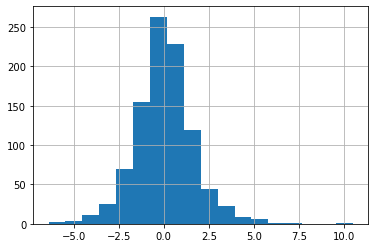

count    959.000000
mean       0.044415
std        1.639275
min       -6.387665
25%       -0.932505
50%        0.000000
75%        0.899192
max       10.470588
Name: Close, dtype: float64

In [8]:
# 주가 일간 변동률 히스토그램
# 삼전 주식 종가의 일간 변동률을 히스토그램으로 출력해보자

import matplotlib.pyplot as plt
sec_dpc = (sec['Close'] - sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()
sec_dpc.describe()

In [9]:
# sec_dpc는 일간 변동률이기 때문에 전체적인 변동률을 누적합으로 구해보자
# cumsum()을 이용한다

sec_dpc_cs = sec_dpc.cumsum()
print( sec_dpc_cs )

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2022-03-24    42.447221
2022-03-25    42.447221
2022-03-28    42.303955
2022-03-29    43.021315
2022-03-30    42.593964
Name: Close, Length: 959, dtype: float64
